    Topic:        Project 1  
    Subject:      Campaign Placement for WomenTechWomenYes Canvassing  
    Date:         07/09/2018  
    Name:         Courtney  
    Worked with:  Tim, Brandon

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from copy import deepcopy

%matplotlib inline

**Import pickeled data file with 4hr interval entries and exits per turnstile**

In [2]:
with open('spatial_4hr_interval_mta.pickle','rb') as read_file:
    time_series_df = pickle.load(read_file)

In [3]:
time_series_df.shape

(2519821, 16)

In [4]:
time_series_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,ENTRIES,EXITS,DATE_TIME,DATE,DESC,TIME_INTERVAL,ENTRY_DIFF,EXIT_DIFF,LAT,LONG,ZIPCODE
0,A002,R051,02-00-00,59 ST,NQR456W,6566470.0,2224053.0,2018-03-31 03:59:00,2018-03-31,REGULAR,04:00:00,7.0,3.0,40.762796,-73.967686,10022
1,A002,R051,02-00-00,59 ST,NQR456W,6566470.0,2224053.0,2018-03-31 07:59:00,2018-03-31,REGULAR,04:00:00,0.0,0.0,40.762796,-73.967686,10022
2,A002,R051,02-00-00,59 ST,NQR456W,6566470.0,2224055.0,2018-03-31 11:59:00,2018-03-31,REGULAR,04:00:00,0.0,2.0,40.762796,-73.967686,10022
3,A002,R051,02-00-00,59 ST,NQR456W,6566470.0,2224055.0,2018-03-31 15:59:00,2018-03-31,REGULAR,04:00:00,0.0,0.0,40.762796,-73.967686,10022
4,A002,R051,02-00-00,59 ST,NQR456W,6566470.0,2224055.0,2018-03-31 19:59:00,2018-03-31,REGULAR,04:00:00,0.0,0.0,40.762796,-73.967686,10022


**ENTRIES per day at each subway station/line combination**

In [5]:
grouping = ['STATION','LINENAME','DATE']

In [6]:
daily_entries_per_station_line = time_series_df.groupby(by=grouping)['ENTRY_DIFF'].sum().reset_index()

In [7]:
daily_entries_per_station_line.shape

(42953, 4)

In [8]:
daily_entries_per_station_line['ENTRY_DIFF'].max()

362547.0

In [9]:
zero_mask_entries = (daily_entries_per_station_line.ENTRY_DIFF == 0)
daily_entries_per_station_line[zero_mask_entries].shape[0]

208

In [10]:
daily_entries_per_station_line.head()

,STATION,LINENAME,DATE,ENTRY_DIFF
0,1 AV,L,2018-03-31,16546.0
1,1 AV,L,2018-04-01,12075.0
2,1 AV,L,2018-04-02,18415.0
3,1 AV,L,2018-04-03,19832.0
4,1 AV,L,2018-04-04,20644.0


**EXITS per day at each subway station/line combination**

In [11]:
daily_exits_per_station_line = time_series_df.groupby(by=grouping)['EXIT_DIFF'].sum().reset_index()

In [12]:
daily_exits_per_station_line.shape

(42953, 4)

In [13]:
daily_exits_per_station_line['EXIT_DIFF'].max()

454117.0

In [14]:
zero_mask_exits = (daily_exits_per_station_line.EXIT_DIFF == 0)
daily_exits_per_station_line[zero_mask_exits].shape[0]

214

In [15]:
daily_exits_per_station_line.head()

,STATION,LINENAME,DATE,EXIT_DIFF
0,1 AV,L,2018-03-31,18089.0
1,1 AV,L,2018-04-01,13945.0
2,1 AV,L,2018-04-02,19708.0
3,1 AV,L,2018-04-03,22533.0
4,1 AV,L,2018-04-04,22280.0


**Merge daily entries and exits by station-line into a single data file**

In [16]:
daily_station_line_counts = pd.merge(daily_entries_per_station_line, daily_exits_per_station_line, on=['STATION', 'LINENAME', 'DATE'])

In [17]:
daily_station_line_counts.head()

,STATION,LINENAME,DATE,ENTRY_DIFF,EXIT_DIFF
0,1 AV,L,2018-03-31,16546.0,18089.0
1,1 AV,L,2018-04-01,12075.0,13945.0
2,1 AV,L,2018-04-02,18415.0,19708.0
3,1 AV,L,2018-04-03,19832.0,22533.0
4,1 AV,L,2018-04-04,20644.0,22280.0


In [18]:
daily_station_line_counts.shape

(42953, 5)

**Remove days with zero ENTRIES or EXITS from the dataset. Assumption: subway stations that had 0 entries or exits for a full 24 hours are incorrect data or were closed, so removed**

In [19]:
daily_station_line_counts= daily_station_line_counts[daily_station_line_counts.ENTRY_DIFF != 0]

In [20]:
daily_station_line_counts= daily_station_line_counts[daily_station_line_counts.EXIT_DIFF != 0]

In [21]:
daily_station_line_counts.shape

(42586, 5)

**Get summed daily entries and exits for each day, by Station and Line**

In [22]:
daily_station_line_counts['DAILY_TOTAL'] = daily_station_line_counts['ENTRY_DIFF'] + daily_station_line_counts['EXIT_DIFF']

In [23]:
daily_station_line_counts.head()

,STATION,LINENAME,DATE,ENTRY_DIFF,EXIT_DIFF,DAILY_TOTAL
0,1 AV,L,2018-03-31,16546.0,18089.0,34635.0
1,1 AV,L,2018-04-01,12075.0,13945.0,26020.0
2,1 AV,L,2018-04-02,18415.0,19708.0,38123.0
3,1 AV,L,2018-04-03,19832.0,22533.0,42365.0
4,1 AV,L,2018-04-04,20644.0,22280.0,42924.0


In [24]:
daily_station_line_counts['DAILY_TOTAL'].max()

620725.0

**Save the daily totals by station-line file**

In [25]:
with open('daily_station_line_counts.pickle', 'wb') as to_write:
    pickle.dump(daily_station_line_counts, to_write)

In [26]:
with open('daily_station_line_counts.pickle','rb') as read_file:
    daily_station_line_counts = pickle.load(read_file)

In [27]:
daily_station_line_counts.head()

,STATION,LINENAME,DATE,ENTRY_DIFF,EXIT_DIFF,DAILY_TOTAL
0,1 AV,L,2018-03-31,16546.0,18089.0,34635.0
1,1 AV,L,2018-04-01,12075.0,13945.0,26020.0
2,1 AV,L,2018-04-02,18415.0,19708.0,38123.0
3,1 AV,L,2018-04-03,19832.0,22533.0,42365.0
4,1 AV,L,2018-04-04,20644.0,22280.0,42924.0


**Get total counts per station-line - over the entire season of April/May/June**

In [28]:
total_spring_station_line_counts = daily_station_line_counts.groupby(by=['STATION', 'LINENAME'])['DAILY_TOTAL'].sum().reset_index()

In [29]:
total_spring_station_line_counts.rename(columns={'DAILY_TOTAL': 'SPRING_TOTAL'}, inplace=True)

In [30]:
total_spring_station_line_counts.sort_values(by="SPRING_TOTAL", ascending=False).head(10)

,STATION,LINENAME,SPRING_TOTAL
312,GRD CNTRL-42 ST,4567S,21730974.0
89,34 ST-HERALD SQ,BDFMNQRW,17172214.0
93,34 ST-PENN STA,ACE,12255887.0
28,14 ST-UNION SQ,LNQR456W,11295947.0
102,42 ST-PORT AUTH,ACENQRS1237W,11058079.0
448,TIMES SQ-42 ST,1237ACENQRSW,10160010.0
302,FULTON ST,2345ACJZ,9358996.0
125,59 ST COLUMBUS,ABCD1,8620281.0
106,47-50 STS ROCK,BDFM,8532375.0
289,FLUSHING-MAIN,7,8442750.0


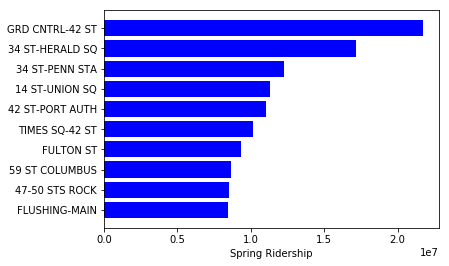

In [31]:
spring_riders = total_spring_station_line_counts.sort_values(by="SPRING_TOTAL", ascending=False).head(10)

fig, ax = plt.subplots()

stations = spring_riders.STATION
y_pos = np.arange(len(stations))
riders = spring_riders.SPRING_TOTAL

ax.barh(y_pos, riders, align='center',
        color='blue', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(stations)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Spring Ridership')

plt.show()